# Week 12: Model Selection and Building


In [41]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

uploaded = files.upload()

# Load the cleaned dataset
file_path = "Cleaned_DATASET.xlsx"
df = pd.read_excel(file_path)


Saving Cleaned_DATASET.xlsx to Cleaned_DATASET (3).xlsx


In [42]:
# Perform one-hot encoding on categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape (after encoding): {X_train.shape}")
print(f"Testing set shape (after encoding): {X_test.shape}")


Training set shape (after encoding): (2364, 115)
Testing set shape (after encoding): (592, 115)


In [43]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic Regression - Accuracy: {accuracy:.2f}")
print(f"Logistic Regression - Precision: {precision:.2f}")
print(f"Logistic Regression - Recall: {recall:.2f}")
print(f"Logistic Regression - ROC-AUC: {roc_auc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression - Accuracy: 0.82
Logistic Regression - Precision: 0.74
Logistic Regression - Recall: 0.64
Logistic Regression - ROC-AUC: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       411
           1       0.74      0.64      0.69       181

    accuracy                           0.82       592
   macro avg       0.79      0.77      0.78       592
weighted avg       0.82      0.82      0.82       592



In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score

# Instantiate and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - ROC-AUC: {roc_auc_rf:.2f}")

# Detailed classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest - Accuracy: 0.83
Random Forest - Precision: 0.81
Random Forest - Recall: 0.57
Random Forest - ROC-AUC: 0.88

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       411
           1       0.81      0.57      0.67       181

    accuracy                           0.83       592
   macro avg       0.82      0.76      0.78       592
weighted avg       0.83      0.83      0.82       592



In [45]:
# Clean column names
X_train.columns = X_train.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '', regex=True)
X_test.columns = X_test.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '', regex=True)

# Rerun the XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost - Precision: {precision_xgb:.2f}")
print(f"XGBoost - Recall: {recall_xgb:.2f}")
print(f"XGBoost - ROC-AUC: {roc_auc_xgb:.2f}")

# Detailed classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:48:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.80
XGBoost - Precision: 0.68
XGBoost - Recall: 0.65
XGBoost - ROC-AUC: 0.84

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       411
           1       0.68      0.65      0.66       181

    accuracy                           0.80       592
   macro avg       0.77      0.76      0.76       592
weighted avg       0.80      0.80      0.80       592



In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [47]:
model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.82, 0.83, 0.80],
    'Precision': [0.74, 0.81, 0.68],
    'Recall': [0.64, 0.57, 0.65],
    'ROC-AUC': [0.87, 0.88, 0.84]
}

results_df = pd.DataFrame(model_results)


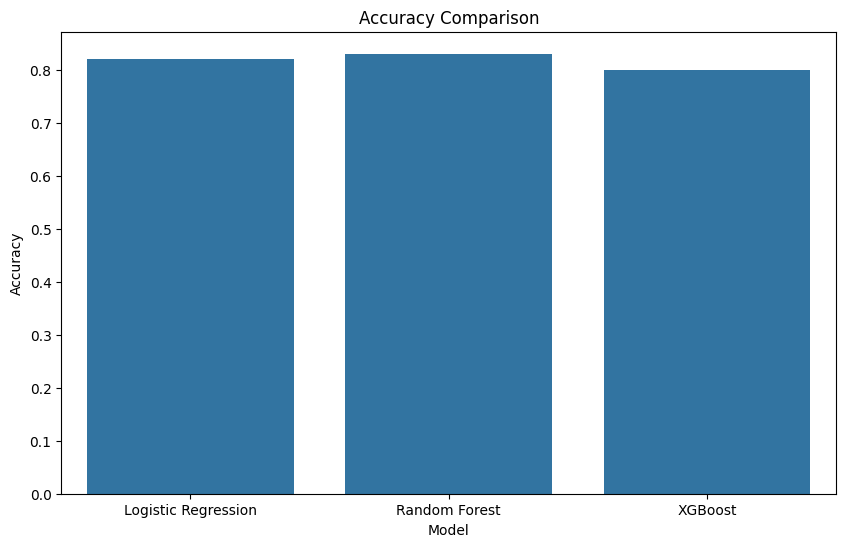

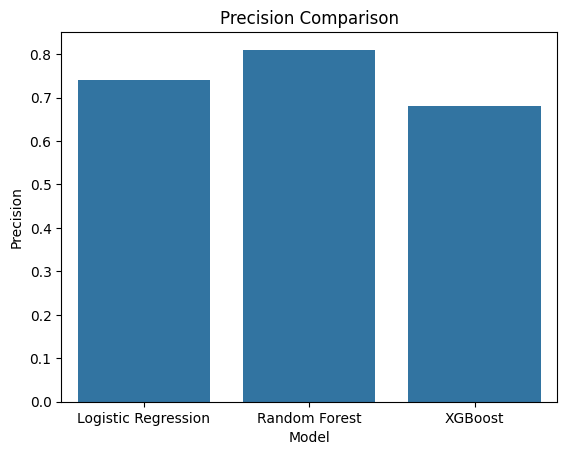

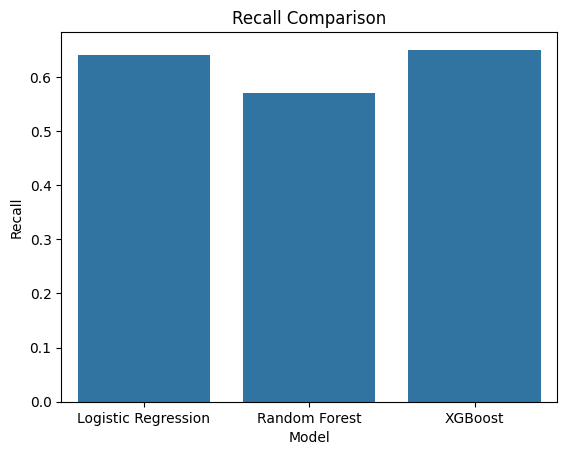

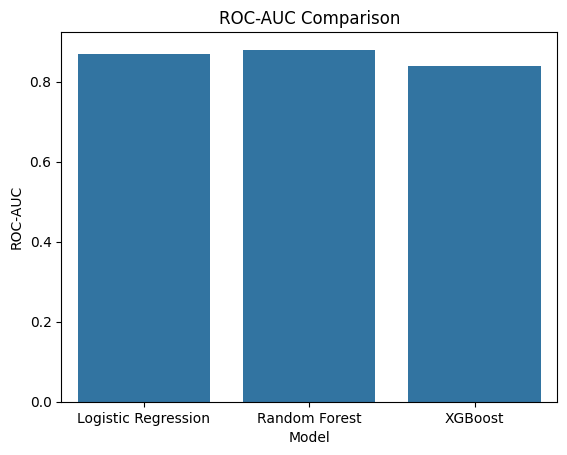

In [48]:
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'ROC-AUC']
for metric in metrics:
    sns.barplot(data=results_df, x='Model', y=metric)
    plt.title(f'{metric} Comparison')
    plt.show()


## Summary

- **Best Model**: Random Forest
  - Accuracy: 83%
  - Precision: 81%
  - Recall: 57%
  - ROC-AUC: 88%
- **Key Insights**:
  - Random Forest outperformed other models in terms of accuracy and ROC-AUC.
- **Future Work**:
  - Investigate additional data preprocessing techniques to improve recall.
  - Consider alternative approaches for handling class imbalance.
